### Bonjour, on se propose dans ce Notebook de faire une analyse descriptive d'un jeu de données relatives à des patients qui sont malades de *bactérémie*, ou bien sont en bonne santé. ###
Le bactérémie est l'état dans lequel un pathogène a gagné le sang, c'est très dangereux, ça peut être fatal. 
Les variables qu'on a pour les patients sont différentes mesures effectuées à partir d'**examens du sang**. 



données dispo ici : https://zenodo.org/records/7554815#.ZF-dztLMK-Y

In [1]:
import pandas as pd
import numpy as np
import random
from random import sample

In [2]:
table = pd.read_csv("/home/zuko/Téléchargements/Bacteremia_public_S2.csv", index_col='ID')
table[:5].T

ID,1,3,5,7,9
SEX,2,1,1,1,2
AGE,62,72,46,84,38
MCV,99.3,85.1,96.3,91.3,85.1
HGB,11.5,10.3,7.4,10.3,13.7
HCT,35.9,34.7,22.8,31.1,38.7
PLT,307.0,182.0,64.0,309.0,183.0
MCH,31.5,26.0,31.2,30.4,30.2
MCHC,31.8,30.6,32.4,33.3,35.3
RDW,19.5,15.0,19.7,13.8,12.6
MPV,10.8,9.7,11.1,8.5,10.0


In [3]:
table.sort_index(inplace=True) #améliore la perf et permet gérer eventuelles erreurs si des ind dupliqués

In [8]:
table.map(lambda x  : pd.isna(x)).sum(axis=1)

ID
1         0
3        10
5         4
7         0
9         2
         ..
62436     4
62438    14
62446     4
62454     0
62455     0
Length: 14691, dtype: int64

In [5]:
table.shape # on a > 14000 ind! 

(14691, 52)

In [ ]:
# on pourrait elaguer les colonnes ayant vraiment trop de NAN?
#table.drop(columns = [col for col in table.columns if table[col].isnull().sum() > 3000], inplace = True)

In [12]:
# quelles colonnes ont enormement de nan?
l = ((col, table[col].isnull().sum()) for col in table.columns if table[col].isnull().sum() > 200)
#%timeit list(l)
list(l)[:3]

[('MPV', 702), ('LYM', 262), ('MONO', 246)]

In [13]:
l = ((col, table[col].isnull().sum()) for col in table.columns if table[col].isnull().sum() > 200)
print(f"{len(list(l))} colonnes ont plus de 200 NAN")

37 colonnes ont plus de 200 NAN


In [14]:
def compteur_nan(df):
    for ind in df.index:
        nan_val = 0
        for value in df.loc[ind] :
            if pd.isna(value) == True:
                nan_val += 1
        if nan_val > 0: #compter lignes sans NAN
            yield (ind, nan_val) #ici on sort des tuples car on veut examiner nombres nan par index

In [15]:
print(f"{len(list(compteur_nan(table)))} lignes len(NAN) > 0") 
list(compteur_nan(table))[:10]

10712 lignes len(NAN) > 0


[(3, 10),
 (5, 4),
 (9, 2),
 (11, 13),
 (12, 2),
 (13, 13),
 (25, 10),
 (26, 9),
 (27, 16),
 (28, 10)]

In [16]:
def nan_lignes(df):
    for ind in df.index: #The index (row labels) of the DataFrame. (from documentation)
        nan_val = 0
        for value in df.loc[ind] :
            if pd.isna(value) == True:
                nan_val += 1
        if nan_val > 5: #compter lignes avec NAN
            yield ind#(ind, nan_val)

In [17]:
table.drop(index = [ind for ind in nan_lignes(table)], inplace = True)
#test que ca a marché
print(f"{len(list(nan_lignes(table)))} lignes avec plus de 5 NAN") 

0 lignes avec plus de 5 NAN


In [19]:
long = len(list(compteur_nan(table))) # len de liste lignes ayant 0 >= NAN > 6
k = 3 #on tire k individu
choice = random.sample(range(long), k) #on tire k ind au hasard parmi nos individus qui ondes NAN mais < 6
print(f"on tire {choice[-1]} ème des lignes qui ont des NAN<6, la liste fait {len(list(compteur_nan(table)))} lignes")

ch_ligne, _ = list(compteur_nan(table))[choice.pop()] #recupère individu ou index_label à partir tirage
print(f"son index_label est : {ch_ligne}")
res = table.loc[ch_ligne].T

on tire 2123 ème des lignes qui ont des NAN<6, la liste fait 6124 lignes
son index_label est : 20075


In [20]:
res, res.index[0]# list(nan_seuil(compteur_nan(table)))[choice.pop()]

(SEX                     1
 AGE                    32
 MCV                  87.9
 HGB                   8.2
 HCT                  26.7
 PLT                 237.0
 MCH                  27.6
 MCHC                 31.6
 RDW                  15.6
 MPV                  11.3
 LYM                   1.5
 MONO                  0.4
 EOS                   0.1
 BASO                  0.0
 NT                   89.0
 APTT                 38.5
 FIB                1098.0
 SODIUM              153.0
 POTASS                4.0
 CA                   2.14
 PHOS                 1.22
 MG                   0.84
 CREA                 0.94
 BUN                  40.0
 HS                    NaN
 GBIL                 0.54
 TP                   60.4
 ALB                  24.8
 AMY                  33.0
 PAMY                 32.0
 LIP                  17.0
 CHE                  3.13
 AP                  121.0
 ASAT                 17.0
 ALAT                 17.0
 GGT                 179.0
 LDH                 206.0
 

In [22]:
table.index[1]

5

In [23]:
def affecter_nan(df):
    for col in df.columns:
        if table[col].isnull().sum() > 0:
            for ind, val in enumerate(table[col]): #ind ici est rang dans series
                if pd.isna(val) == True:
                    table.loc[table.index[ind], col] = table[col].mean()

In [24]:
#%timeit 
affecter_nan(table)

In [25]:
len(list(compteur_nan(table))) #test s'il reste des lignes qui ont des Nan

0

In [ ]:
#X = np.linspace(0., 10., 50) array plus rapide que listes, linspace : creer array avec (borne, borne incluse, nb de pts)
#out_data = (une_fonction(x) for x in in_data)

En fait en numpy on passe son temps à écrire des expressions dont les éléments sont des tableaux, et cela produit des opérations membre à membre, comme on vient de le voir avec cosinus.

In [ ]:
# l'énorme majorité du temps, on écrit avec numpy
# des expressions qui impliquent des tableaux
# exactement comme si c'était des nombres

In [ ]:
#np.all(a == b) vérifier que tous les éléments du tableau sont vrais

on utilise plutôt les tableaux logiques comme des masques, pour faire ou non des opérations sur un autre tableau

In [28]:
table.groupby('BloodCulture', observed=True).mean(numeric_only=True).T

BloodCulture,no,yes
SEX,1.408546,1.422222
AGE,55.883273,62.835294
MCV,88.434847,89.049281
HGB,11.650129,11.328105
HCT,34.778368,33.722484
PLT,226.666631,195.124183
MCH,29.600782,29.910588
MCHC,33.465646,33.581438
RDW,14.902136,15.343791
MPV,10.400525,10.465191


In [ ]:
#s = s.sort_index() ne fait pas de tri en place il faut reaffecter

In [ ]:
#table.loc[:, 'globules'].mean()
#lignes = table.loc[:, 'sex'] == 'M'
#table.loc[lignes, 'globules'].mean()

In [26]:
# quels sont les taux de lymphocytes selon malade/ sain et selon sexe? (1=male)
table.pivot_table('LYM',
                  aggfunc = 'mean',
                  index = 'BloodCulture',
                  columns = 'SEX'
                 )

SEX,1,2
BloodCulture,,
no,1.256401,1.264168
yes,0.885068,0.783282


In [29]:
pca_df = table.copy().drop(columns = ['SEX', 'BloodCulture'])

In [30]:
table.shape

(10103, 52)

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca_df = table.copy().drop(columns = ['SEX', 'BloodCulture'])
data = pca_df.values#.T
scaler = StandardScaler()
scaled_data = scaler.fit(data)
scaled_data = scaler.transform(data)
pca = PCA()
p = pca.fit(scaled_data)

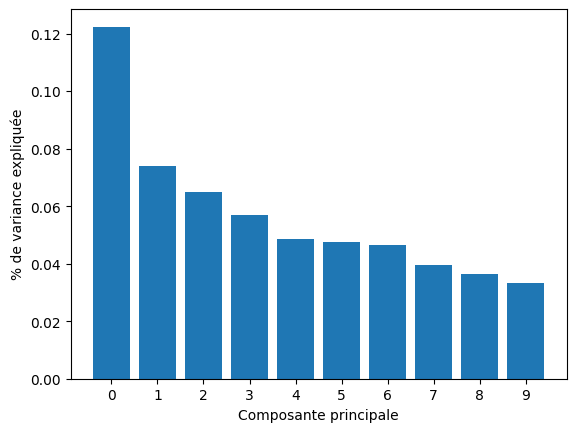

In [64]:
ratios = pca.explained_variance_ratio_[:10]

plt.bar(range(len(ratios)), ratios)
plt.xticks(range(len(ratios)))
plt.xlabel("Composante principale")
plt.ylabel("% de variance expliquée")
plt.show()

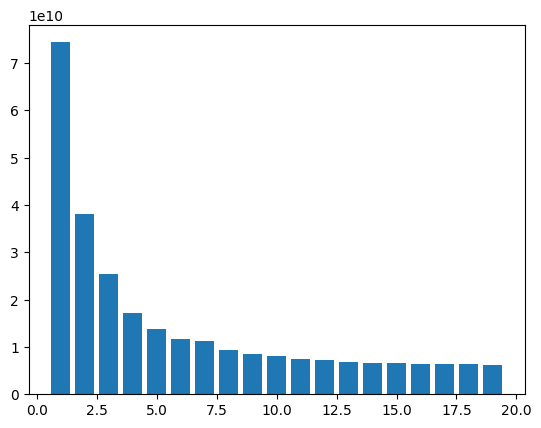

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

array = []
for i in range(1,20):
    kmeans_i = KMeans(n_clusters=i, n_init=1, init='random').fit(data)
    inertie = kmeans_i.inertia_
    array.append(inertie)
plt.bar(range(1,20), array)
plt.show()

In [36]:
kmeans = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(data)
pred = kmeans.predict(data)

In [50]:
comp.shape

(50, 50)

/tmp/ipykernel_180888/3871705466.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ax.scatter(comp[:,0], comp[:,1], comp[:,2], c=table['BloodCulture'].replace({'yes':1, 'no':0}), marker=".", alpha=0.6)#c=table['BloodCulture'].replace({'yes':1, 'no':0})


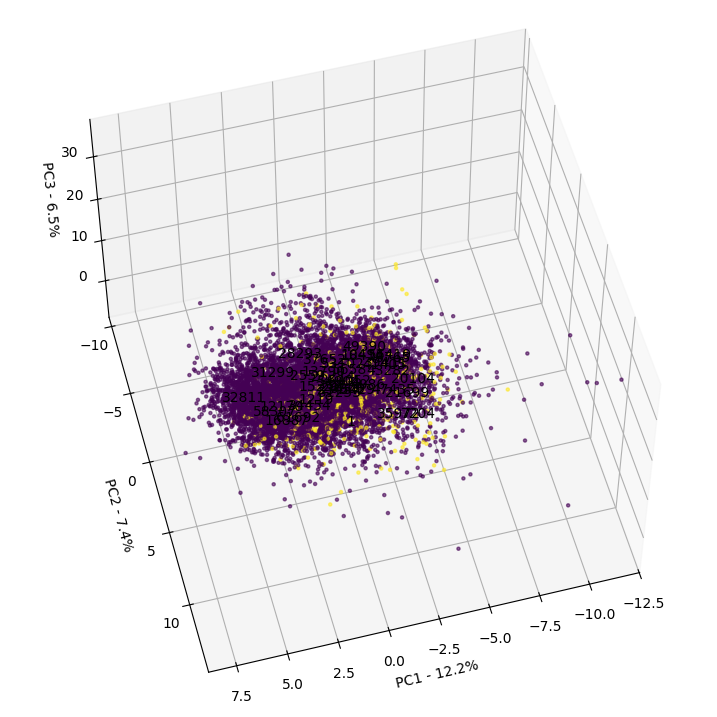

In [70]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 12))
ax = fig.add_subplot(111, projection='3d', elev=55, azim=75)
comp = p.transform(scaled_data)
# La couleur des points dépend de leur étiquette issue de kmeans 11 (label)
ax.scatter(comp[:,0], comp[:,1], comp[:,2], c=table['BloodCulture'].replace({'yes':1, 'no':0}), marker=".", alpha=0.6)#c=table['BloodCulture'].replace({'yes':1, 'no':0})
ax.set_xlabel(f"PC1 - {100*p.explained_variance_ratio_[0]:.1f}%")
ax.set_ylabel(f"PC2 - {100*p.explained_variance_ratio_[1]:.1f}%")
ax.set_zlabel(f"PC3 - {100*p.explained_variance_ratio_[2]:.1f}%")
for i in np.arange(0, comp.shape[0], 270): #this part is based on a stackoverflow discussion
    ax.text(comp[i,0], comp[i,1], comp[i,2], s=pca_df.index[i])
plt.show()

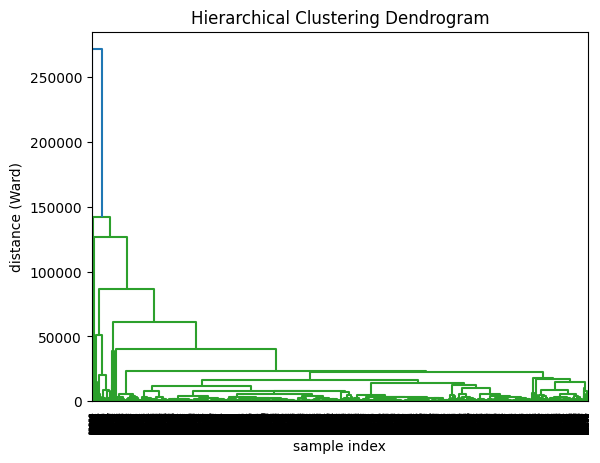

In [72]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(data, 'ward')
# Plot title
plt.title('Hierarchical Clustering Dendrogram')
# Plot axis labels
plt.xlabel('sample index')
plt.ylabel('distance (Ward)')
# Make the dendrogram
dendrogram(Z, labels=table.index, leaf_rotation=90)
# Show the graph
plt.show()